In [33]:
import numpy as np
import matplotlib.pyplot as plt

a = np.ones((10,4,4))

for i in range(a.shape[0]):
    a[i] = (i+1)*a[i]
    
def get_brightest_diff_pattern(diffraction_patterns):
    maximums = []
    for i in range(diffraction_patterns.shape[0]):
        maximums.append(np.max(diffraction_patterns[i]))
    idx_where_max = np.where(maximums==np.max(maximums))
    return idx_where_max[0][0]


def probe_power_correction(probe,diffraction_patterns):
    correction_factor = np.sqrt(np.sum(np.abs(diffraction_patterns[get_brightest_diff_pattern(diffraction_patterns)])**2)/ (diffraction_patterns.shape[1]*diffraction_patterns.shape[2]*np.sum(np.abs(probe)**2)) )
    probe = probe*correction_factor
    return probe
                                

11.985042666751893

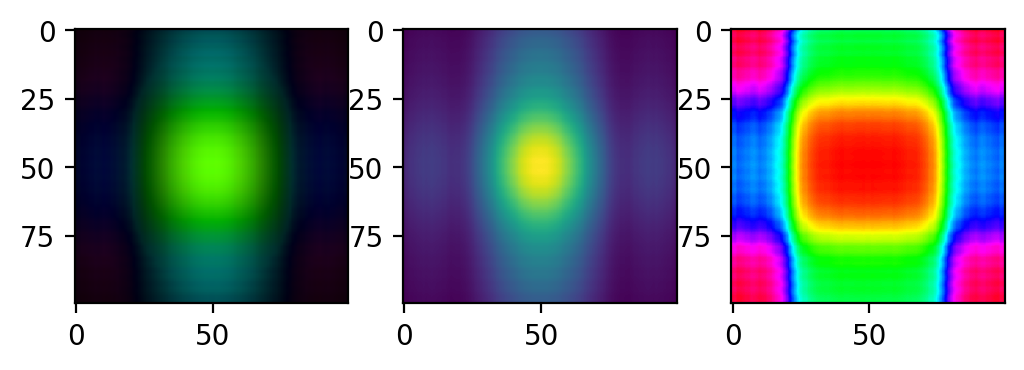

In [52]:

def load_realistic_probe(halfsize=50, path= "/home/ABTLUS/yuri.tonin/00000000/data/ptycho3d/complex_phantom/model/probe_at_focus_1.25156micros_pixel.npy"):

    from sscMisc.plots import convert_complex_to_RGB
    
    pixel_size = 1.25156e-6 # meters

    probe = np.load(path)
    probe = probe[probe.shape[0]//2-halfsize:probe.shape[0]//2+halfsize,probe.shape[1]//2-halfsize:probe.shape[1]//2+halfsize]
    
    if 1:
        probe_rgb = convert_complex_to_RGB(probe)
        fig, ax = plt.subplots(1,3,dpi=200)
        ax[0].imshow(probe_rgb,cmap='hsv')
        ax[1].imshow(np.abs(probe))
        ax[2].imshow(np.angle(probe),cmap='hsv')
    
    return probe 
load_realistic_probe().shape

15/1.25156